## Load Data and Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# Load dataset
df = pd.read_csv("EM.csv")  # Adjust the path if needed

# Preview
print(df.shape)
df.head()


(8176, 72)


,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.0,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.0,2582700.0,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.0,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.0,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.0,553800.0,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519


## EDA: Analyze Two Features

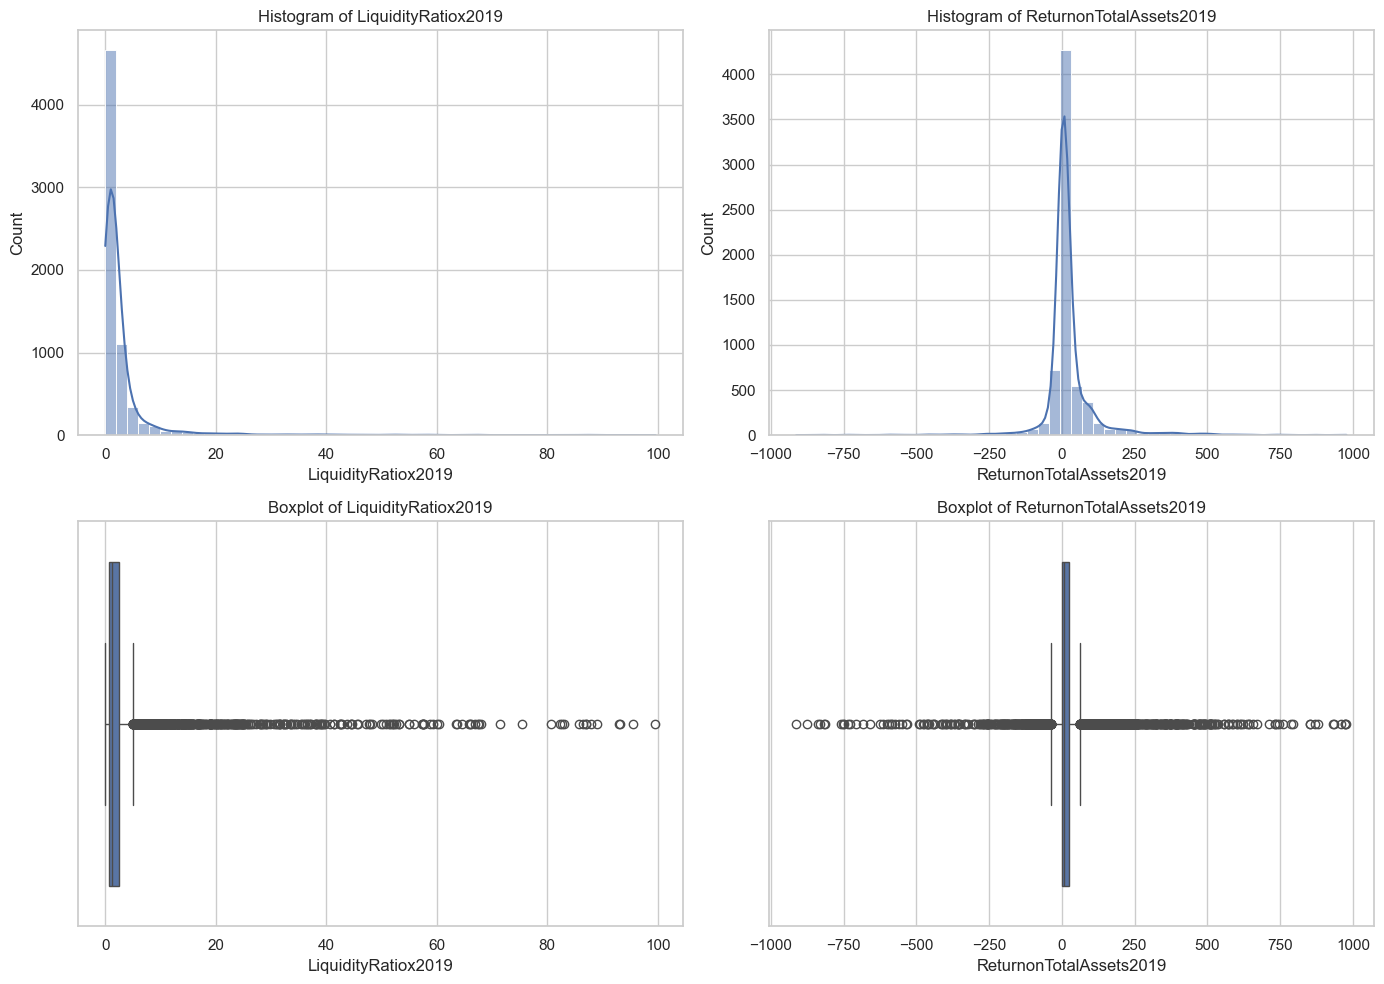

In [10]:
# Choose two meaningful features
eda_features = ['LiquidityRatiox2019', 'ReturnonTotalAssets2019']
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograms
sns.histplot(df[eda_features[0]].dropna(), bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title(f'Histogram of {eda_features[0]}')
sns.histplot(df[eda_features[1]].dropna(), bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title(f'Histogram of {eda_features[1]}')

# Boxplots
sns.boxplot(x=df[eda_features[0]], ax=axs[1, 0])
axs[1, 0].set_title(f'Boxplot of {eda_features[0]}')
sns.boxplot(x=df[eda_features[1]], ax=axs[1, 1])
axs[1, 1].set_title(f'Boxplot of {eda_features[1]}')

plt.tight_layout()
plt.show()


## Preprocessing and Feature Engineering


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1359
           1       0.99      0.99      0.99      1094

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



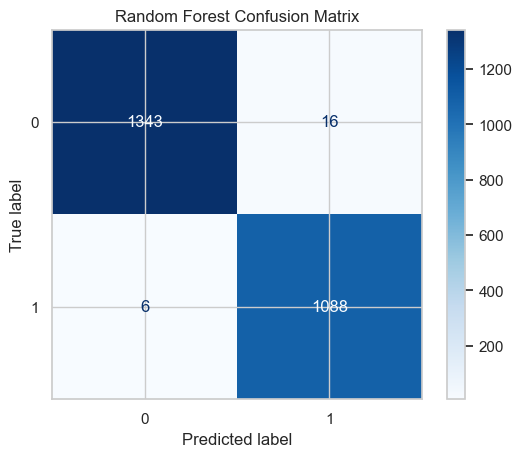

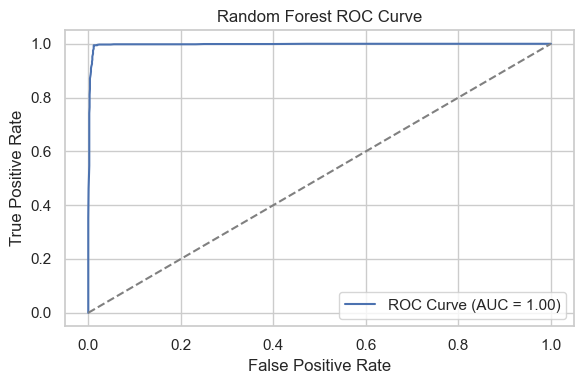

Random Forest CV Accuracy: 0.9928 ± 0.0017
Logistic Regression CV Accuracy: 0.9916 ± 0.0012


In [11]:
# Create target variable
mean_score = df['Creditscore'].mean()
df['CreditLevel'] = (df['Creditscore'] > mean_score).astype(int)

# Use only numerical features (excluding target and score)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in ['Creditscore', 'CreditLevel']:
    if col in numerical_cols:
        numerical_cols.remove(col)

X = df[numerical_cols].fillna(df[numerical_cols].mean())
y = df['CreditLevel']

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#two machine learning classification methods 
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# Load dataset
df = pd.read_csv("EM.csv")  # Adjust path if needed

# Create target variable 'CreditLevel'
mean_score = df['Creditscore'].mean()
df['CreditLevel'] = (df['Creditscore'] > mean_score).astype(int)

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in ['Creditscore', 'CreditLevel']:
    if col in numerical_cols:
        numerical_cols.remove(col)

X = df[numerical_cols].fillna(df[numerical_cols].mean())
y = df['CreditLevel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
rf_model = RandomForestClassifier(random_state=123)
lr_model = LogisticRegression(max_iter=1000, random_state=123)

# Cross-validation scores
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Fit best model (Random Forest)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# Display cross-validation results
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")
print(f"Logistic Regression CV Accuracy: {lr_cv_scores.mean():.4f} ± {lr_cv_scores.std():.4f}")



In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import auc, roc_curve

In [19]:
# Load dataset
df = pd.read_csv("EM.csv")  # Adjust path if needed

# Create target variable 'CreditLevel'
mean_score = df['Creditscore'].mean()
df['CreditLevel'] = (df['Creditscore'] > mean_score).astype(int)

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in ['Creditscore', 'CreditLevel']:
    if col in numerical_cols:
        numerical_cols.remove(col)

X = df[numerical_cols].fillna(df[numerical_cols].mean())
y = df['CreditLevel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Classifier (Model 1)

Random Forest CV Accuracy: 0.9928 ± 0.0017


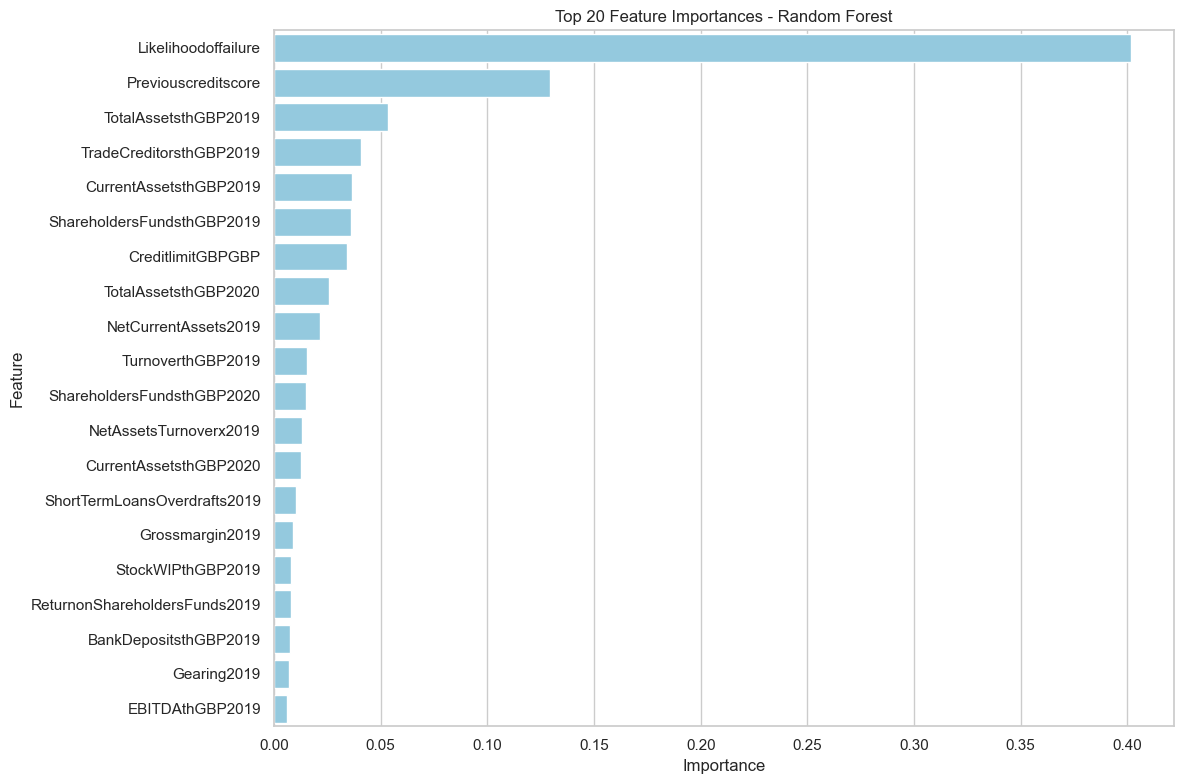


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1359
           1       0.99      0.99      0.99      1094

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



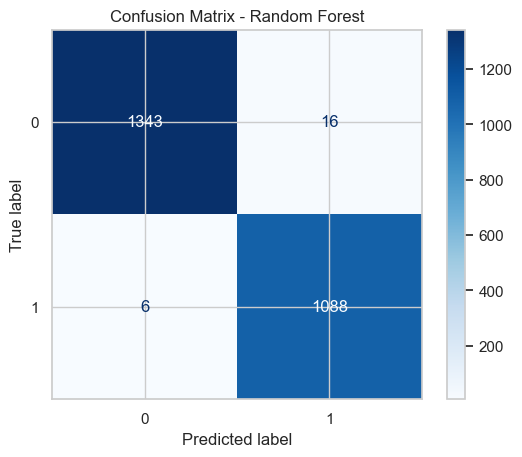

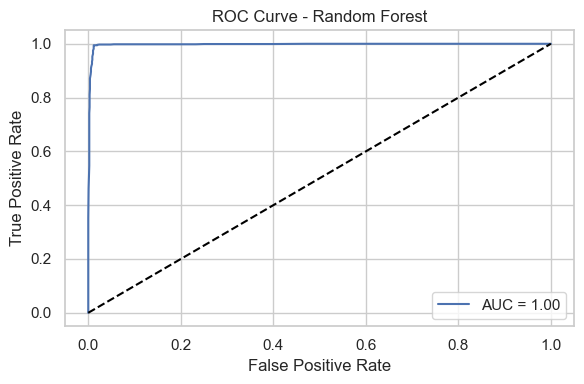

In [21]:
# Define model
rf_model = RandomForestClassifier(random_state=123)

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# Train
rf_model.fit(X_train_scaled, y_train)

# Feature importances (Top 20)
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)
top_features = feat_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index, color='skyblue')
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Evaluate on test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

## Logistic Regression Classifier (Model 2)

Logistic Regression CV Accuracy: 0.9916 ± 0.0012

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.98      0.99      0.99      1094

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



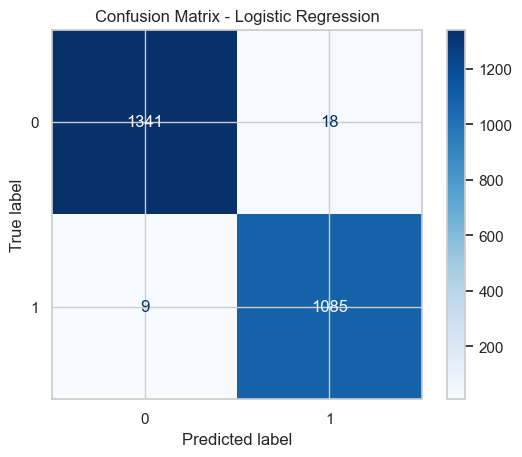

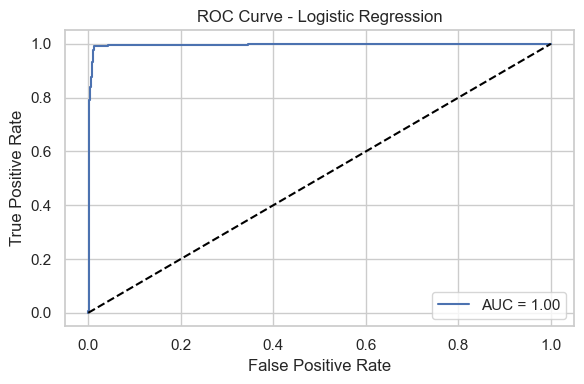

In [25]:
# Define model
lr_model = LogisticRegression(max_iter=1000, random_state=123)

# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {lr_cv_scores.mean():.4f} ± {lr_cv_scores.std():.4f}")

# Train
lr_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {roc_auc_lr:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


## Cross-Validation for Both Models

In [15]:
# Define models
rf_model = RandomForestClassifier(random_state=123)
lr_model = LogisticRegression(max_iter=1000, random_state=123)

# 5-fold CV
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print results
print(" Cross-Validation Accuracy (5-Fold):")
print(f"Random Forest       -> Mean: {rf_scores.mean():.4f}, Std Dev: ±{rf_scores.std():.4f}")
print(f"Logistic Regression -> Mean: {lr_scores.mean():.4f}, Std Dev: ±{lr_scores.std():.4f}")


 Cross-Validation Accuracy (5-Fold):
Random Forest       -> Mean: 0.9928, Std Dev: ±0.0017
Logistic Regression -> Mean: 0.9916, Std Dev: ±0.0012


## Evaluation on Test Set (Random Forest)


 Classification Report (Random Forest on Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1359
           1       0.99      0.99      0.99      1094

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



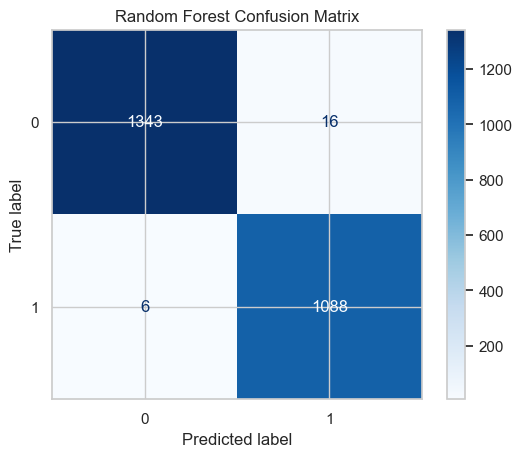

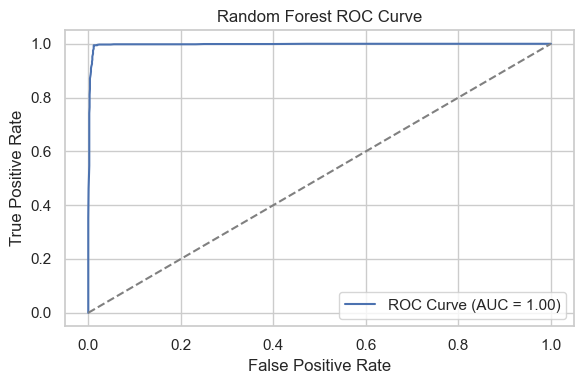

In [23]:
# Fit Random Forest and predict
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Classification report
print("\n Classification Report (Random Forest on Test Set):")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


## Feature Importance from Random Forest

In [25]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10
print("\n Top 10 Most Important Features for Predicting CreditLevel:")
print(feat_importance_df.head(10).to_string(index=False))



 Top 10 Most Important Features for Predicting CreditLevel:
                   Feature  Importance
       Likelihoodoffailure    0.401748
       Previouscreditscore    0.129450
      TotalAssetsthGBP2019    0.053423
   TradeCreditorsthGBP2019    0.040598
    CurrentAssetsthGBP2019    0.036595
ShareholdersFundsthGBP2019    0.036169
         CreditlimitGBPGBP    0.034187
      TotalAssetsthGBP2020    0.025793
      NetCurrentAssets2019    0.021400
         TurnoverthGBP2019    0.015576


## Compare Random Forest vs Logistic Regression on Test Set


 Classification Report: Logistic Regression on Test Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.98      0.99      0.99      1094

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



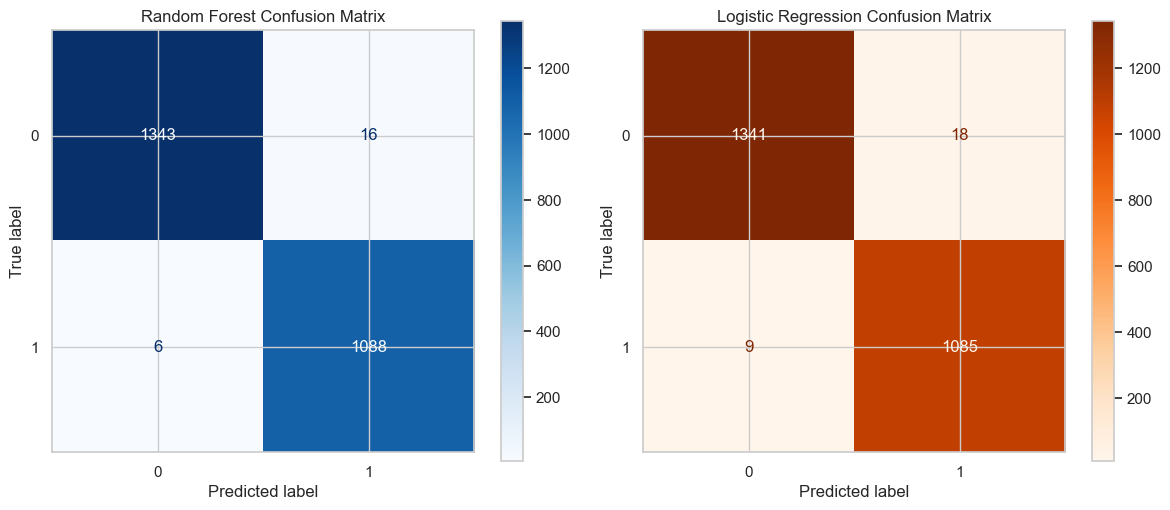

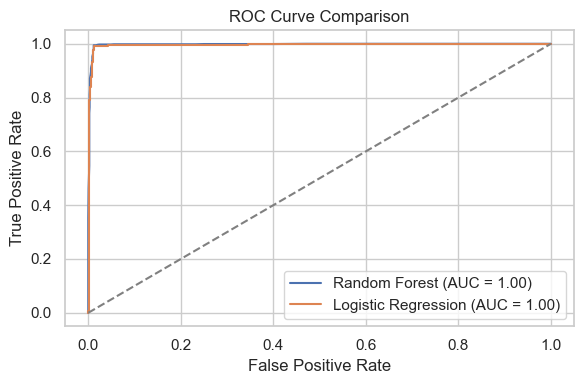

In [27]:
# 1. Fit Logistic Regression
lr_model.fit(X_train_scaled, y_train)

# 2. Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# 3. Classification Reports
print("\n Classification Report: Logistic Regression on Test Set")
print(classification_report(y_test, y_pred_lr))

# 4. Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# RF
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=ax[0], cmap='Blues')
ax[0].set_title("Random Forest Confusion Matrix")

# LR
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=ax[1], cmap='Oranges')
ax[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

# 5. ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()


## Bar chart of Top 10 Feature Importances

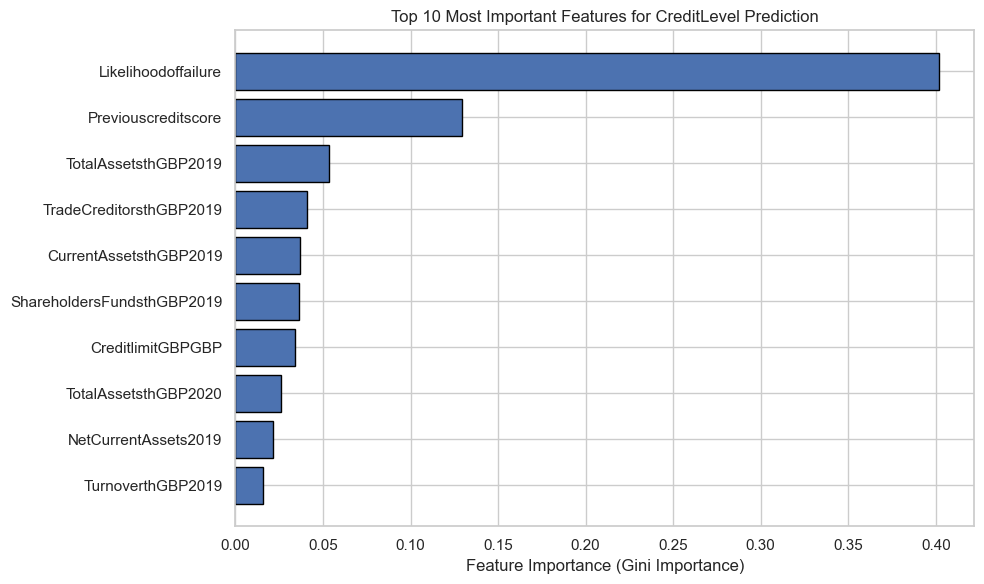

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the fitted Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame and sort
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top10 = feat_importance_df.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top10['Feature'], top10['Importance'], edgecolor='black')
plt.gca().invert_yaxis()  # Highest at top
plt.title("Top 10 Most Important Features for CreditLevel Prediction")
plt.xlabel("Feature Importance (Gini Importance)")
plt.tight_layout()
plt.show()
